
# Logistic Regression: Classifying Apartments as Expensive or Inexpensive

In this notebook, we will use **Logistic Regression** to classify apartments based on their price per square meter.
The goal is to predict whether an apartment is "expensive" or "inexpensive" using available features such as the number of rooms, area, luxurious status, and more.

Logistic Regression is a supervised machine learning algorithm used for binary classification problems.


## Libraries and settings

In [1]:
# Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

u:\Lektionen\GitHub_Repositories\python_machine_learning_basics\Logistic_Regression



## Import Data


In [2]:
# Load dataset
df = pd.read_csv('./Data/apartments_data_enriched_cleaned.csv', delimiter=';')

# Display dataset
df.head()

,field_1,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income,dist_supermarket
0,0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49,0,1441,29.41,12286,1221.272366,5053,24.841283,65362.04268,645.652248
1,1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111,0,2600,23.42,12286,1221.272366,5053,24.841283,65362.04268,265.102153
2,2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58,0,1490,25.69,12286,1221.272366,5053,24.841283,65362.04268,94.401821
3,3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118,0,3240,27.46,12286,1221.272366,5053,24.841283,65362.04268,106.660970
4,4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66,0,1450,21.97,12286,1221.272366,5053,24.841283,65362.04268,974.844209



## Data Preprocessing

Before building the model, we need to preprocess the data. This includes:
- Handling missing values (if any).
- Creating a binary target variable for classification.


In [3]:
# Check for missing values
df.isnull().sum()

# For simplicity, let's define an 'expensive' apartment as one with a price_per_m2 greater than the median
median_price_per_m2 = df['price_per_m2'].median()
df['expensive'] = (df['price_per_m2'] > median_price_per_m2).astype(int)

# Display the updated dataframe
df[['price_per_m2', 'expensive']].head()


,price_per_m2,expensive
0,29.41,1
1,23.42,0
2,25.69,0
3,27.46,0
4,21.97,0



## Splitting the Data

We'll split the dataset into a training set and a test set (80% training, 20% testing).


In [4]:
# Select features for the model (we'll keep it simple for this example)
features = ['rooms', 'area', 'luxurious', 'pop_dens', 'mean_taxable_income', 'dist_supermarket']
X = df[features]
y = df['expensive']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Building the Logistic Regression Model

Now we'll train a logistic regression model on the training set.


In [5]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Display the model coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
})
coefficients

,Feature,Coefficient
0,rooms,-0.277112
1,area,-0.622674
2,luxurious,0.061063
3,pop_dens,1.316716
4,mean_taxable_income,0.558941
5,dist_supermarket,0.005065



## Model Evaluation

Let's evaluate the model on the test set using various metrics.


[[69 11]
 [15 60]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        80
           1       0.85      0.80      0.82        75

    accuracy                           0.83       155
   macro avg       0.83      0.83      0.83       155
weighted avg       0.83      0.83      0.83       155



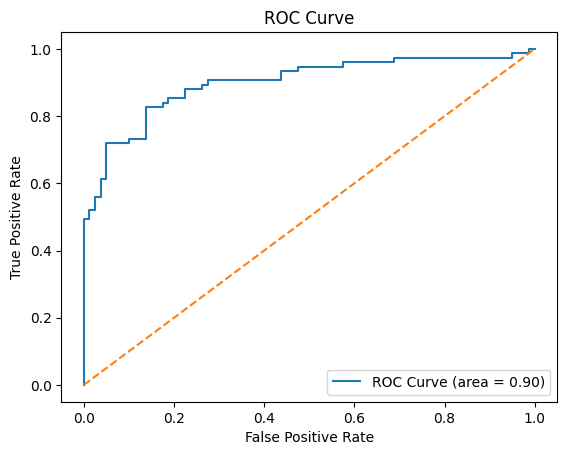

In [6]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC Curve
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



## Conclusion

We have successfully trained a logistic regression model to classify apartments as "expensive" or "inexpensive".
The model was evaluated using metrics like accuracy, precision, recall, and the ROC curve.


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [7]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2024-09-24 18:57:40
Python Version: 3.11.9
-----------------------------------
